<img src="../imgs/Adevinta-ULPGC-logo.jpg" width="530px" align="right">

# **Tutorial de Pytorch 12: Series temporales**

Las series temporales son conjuntos de datos que consisten en secuencias de valores o puntos de información recogidos o registrados en intervalos de tiempo consecutivos. Estos datos se utilizan para analizar tendencias, patrones y ciclos a lo largo del tiempo, permitiendo realizar proyecciones o predicciones futuras, comprender la dinámica temporal de los datos, y tomar decisiones basadas en análisis históricos.

Características clave de las series temporales incluyen:

1. **Dependencia temporal**: Los valores en una serie temporal tienen una fuerte dependencia entre sí, donde los eventos pasados pueden influir o determinar los eventos futuros.

2. **Estacionalidad**: Las series temporales pueden mostrar patrones que se repiten en intervalos regulares, conocidos como estacionalidad. Por ejemplo, una tienda podría vender más helado en verano cada año.

3. **Tendencia**: Las series temporales pueden mostrar una tendencia general a lo largo del tiempo, ya sea al alza, a la baja o estables. La tendencia indica un movimiento general en los datos durante un período prolongado.

4. **Ruido**: Las fluctuaciones aleatorias en los datos, conocidas como ruido, pueden ocurrir debido a la variabilidad inherente de los procesos o a errores de medición.

Las series temporales se encuentran en una amplia gama de aplicaciones, incluyendo economía (por ejemplo, series de tiempo de precios de acciones), meteorología (por ejemplo, registros de temperatura), ciencias sociales (por ejemplo, seguimiento de la población), y muchas otras áreas. El análisis de series temporales es una herramienta clave en la estadística y el aprendizaje automático para modelar y prever comportamientos futuros basándose en datos históricos.

## **Redes fully connected para predicción**

Las redes neuronales de tipo *fully connected* (densas) pueden utilizarse para tareas de predicción en series temporales a través de un proceso de aprendizaje basado en datos históricos. Aunque no son el tipo más común de red neuronal para tratar con series temporales (las redes recurrentes y las redes LSTM suelen ser más adecuadas debido a su habilidad para manejar secuencias de datos y dependencias a largo plazo), las redes densas pueden ser efectivas para problemas de series temporales con horizontes de predicción cortos o cuando la secuencia de tiempo puede ser efectivamente resumida en un conjunto fijo de características. 

### **Ventanas deslizantes**

La idea detrás de las ventanas deslizantes es tomar secuencias consecutivas de datos de la serie temporal como entradas y el punto de datos siguiente (o los siguientes puntos de datos) como la salida o etiqueta. Esto implica definir un tamaño de ventana específico, que es el número de puntos de tiempo consecutivos utilizados para predecir el siguiente punto (o puntos) en la serie.

Por ejemplo, si estamos trabajando con datos diarios de temperatura y nuestro tamaño de ventana es de 4 días, utilizaríamos los datos de temperatura de 4 días consecutivos para predecir la temperatura del día siguiente. Para el siguiente conjunto de datos de entrenamiento, deslizamos la ventana una posición hacia adelante (por ejemplo, usamos los datos del día 2 al día 5 para predecir la temperatura del día 6), y así sucesivamente.

<div align="center">
<img src="./imgs_series_temporales/st1.svg">
</div>

<div align="center">
<img src="./imgs_series_temporales/st2.svg">
</div>

<div align="center">
<img src="./imgs_series_temporales/st3.svg">
</div>


### **Código**

Vamos a implementar estas ideas en un ejemplo de predicción de series temporales utilizando una red neuronal de tipo *fully connected* y utilizando un conjunto de datos sintético de series temporales.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.arange(0.0, 10.0, 0.1)
secuencia = np.sin(x-1)*0.5+0.1*np.sin(5*x) # Nuestra secuencia de valores
secuencia = secuencia + np.random.normal(0, 0.03, len(secuencia)) # Añadimos ruido
max = np.max(secuencia)
min = np.min(secuencia)
secuencia = (secuencia-min)/(max-min) # Normalizamos los valores

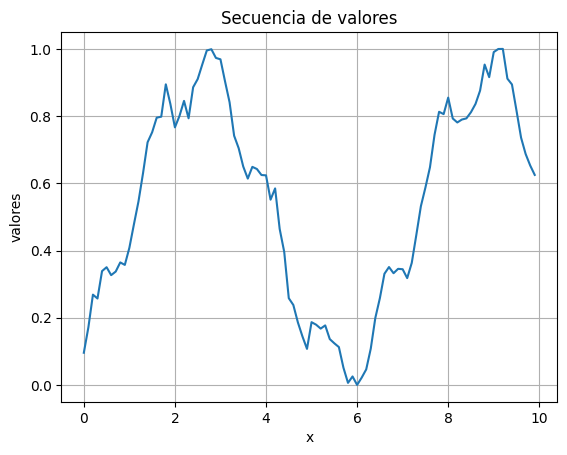

[0.0957331  0.1712529  0.26867458 0.25717659 0.33874878 0.35031865
 0.32671352 0.33736966 0.36460994 0.35714863]
[0.4080794154946747]
----------------------
[0.1712529  0.26867458 0.25717659 0.33874878 0.35031865 0.32671352
 0.33736966 0.36460994 0.35714863 0.40807942]
[0.4779995562983318]
----------------------
[0.26867458 0.25717659 0.33874878 0.35031865 0.32671352 0.33736966
 0.36460994 0.35714863 0.40807942 0.47799956]
[0.5460721185031974]


In [7]:
plt.plot(x, secuencia)
plt.xlabel('x')
plt.ylabel('valores')
plt.title('Secuencia de valores')
plt.grid(True)
plt.show()

longitud_muestra = 10 #Elegido arbitrariamente

muestras_vector = []
etiquetas_vector = []
for i in range(len(secuencia)-longitud_muestra):
    muestras_vector.append(secuencia[i:i+longitud_muestra])
    etiquetas_vector.append([secuencia[i+longitud_muestra]])
    
    
    
print(muestras_vector[0])
print(etiquetas_vector[0])
print("----------------------")
print(muestras_vector[1])
print(etiquetas_vector[1])
print("----------------------")
print(muestras_vector[2])
print(etiquetas_vector[2])

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Definimos la arquitectura de la red neuronal
class FullyConnectedNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(FullyConnectedNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)  # Capa de entrada a oculta
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)  # Capa oculta a salida

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Preparamos los datos para PyTorch
muestras_tensor = torch.tensor(muestras_vector).float()
etiquetas_tensor = torch.tensor(etiquetas_vector).float()

# Creamos un DataLoader
dataset = TensorDataset(muestras_tensor, etiquetas_tensor)
data_loader = DataLoader(dataset, batch_size=4, shuffle=True)

# Instanciamos la red
input_size = longitud_muestra
hidden_size = 50  # Este valor puede ajustarse
output_size = 1  # Un valor de salida porque estamos haciendo predicciones
model = FullyConnectedNet(input_size, hidden_size, output_size)

# Definimos la función de pérdida y el optimizador
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


### **Entrenamiento**

In [9]:
# Entrenamos la red
num_epochs = 4000  # Número de épocas; ajusta según sea necesario
for epoch in range(num_epochs):
    for inputs, targets in data_loader:
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    if (epoch+1) % 200 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')

print("Entrenamiento completado.")


Epoch [200/4000], Loss: 0.00021223085059318691
Epoch [400/4000], Loss: 0.0007889955304563046
Epoch [600/4000], Loss: 0.000369475717889145
Epoch [800/4000], Loss: 4.103793799004052e-06
Epoch [1000/4000], Loss: 0.0015772052574902773
Epoch [1200/4000], Loss: 0.0004786318459082395
Epoch [1400/4000], Loss: 0.00023739368771202862
Epoch [1600/4000], Loss: 0.00021522422321140766
Epoch [1800/4000], Loss: 4.623422137228772e-05
Epoch [2000/4000], Loss: 0.00041969434823840857
Epoch [2200/4000], Loss: 0.0017211895901709795
Epoch [2400/4000], Loss: 0.00015221624926198274
Epoch [2600/4000], Loss: 0.0004475344030652195
Epoch [2800/4000], Loss: 0.0007449627155438066
Epoch [3000/4000], Loss: 0.0003667493292596191
Epoch [3200/4000], Loss: 2.4513201424269937e-06
Epoch [3400/4000], Loss: 0.0006990415859036148
Epoch [3600/4000], Loss: 7.878395990701392e-05
Epoch [3800/4000], Loss: 0.00010058855696115643
Epoch [4000/4000], Loss: 6.765907164663076e-05
Entrenamiento completado.


Ahora vamos a ver qué es lo que la red predice si le introducimos una primera ventana y dejamos que, mediante autorregresión, prediga 200 puntos más

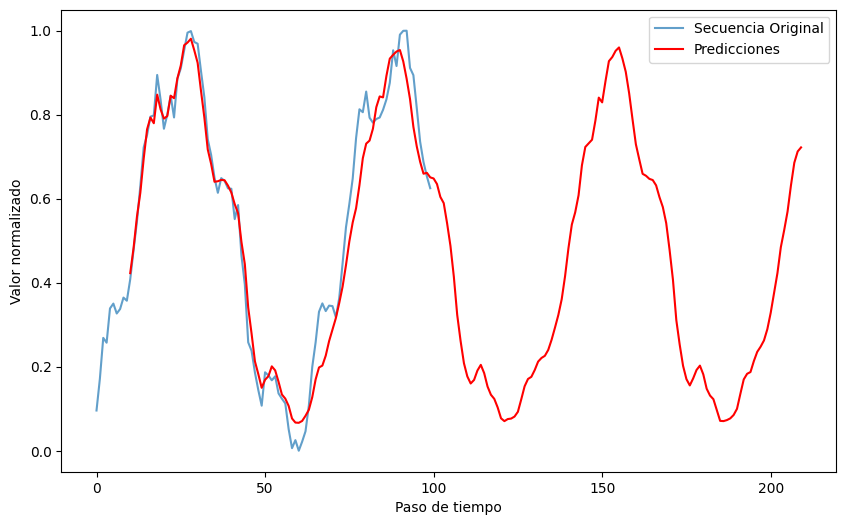

In [10]:
import matplotlib.pyplot as plt

# Aseguramos que el gradiente no se calcule, ya que estamos en modo de inferencia
with torch.no_grad():
    # Tomamos la primera ventana de muestras como punto de partida
    current_window = muestras_tensor[0].view(1, -1)  # Aseguramos que tenga las dimensiones correctas (1, longitud_muestra)

    predictions = []  # Aquí almacenaremos las predicciones

    for _ in range(200):  # Generamos 200 predicciones
        # Hacemos una predicción con la ventana actual
        prediction = model(current_window)
        # Agregamos la predicción a nuestra lista de predicciones
        predictions.append(prediction.item())
        # Preparamos la nueva ventana de muestras
        # Eliminamos el primer elemento de la ventana actual y añadimos la nueva predicción al final
        current_window = torch.cat((current_window[:, 1:], prediction.view(1, -1)), dim=1)

# Convertimos las predicciones en un array de numpy para poder visualizarlas
predictions_array = np.array(predictions)

# Visualización de las predicciones
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(secuencia)), secuencia, label='Secuencia Original', alpha=0.7)
plt.plot(np.arange(longitud_muestra, longitud_muestra + 200), predictions_array, 'r', label='Predicciones')
plt.xlabel('Paso de tiempo')
plt.ylabel('Valor normalizado')
plt.legend()
plt.show()


---

### Ejercicio

Las manchas solares son regiones de la superficie del Sol (concretamente en la fotosfera) que aparecen visiblemente más oscuras que las áreas circundantes. Son causadas por interacciones entre el campo magnético del Sol y su plasma. Las manchas solares son más frías que las áreas circundantes, lo que explica su color más oscuro, con temperaturas que pueden ser hasta 1500 K más bajas que su entorno.

<div align="center">
    <img src="imgs/manchassolares.jpeg">
</div>

La aparición de manchas solares no es aleatoria ni constante; siguen un ciclo solar de aproximadamente 11 años, conocido como el ciclo de actividad solar. Durante este ciclo, el número de manchas solares aumenta y disminuye de manera predecible. Al inicio del ciclo, conocido como mínimo solar, hay pocas manchas solares. A medida que el ciclo progresa hacia el máximo solar, el número de manchas solares aumenta, alcanzando un pico antes de disminuir nuevamente hacia el siguiente mínimo solar. 

La serie temporal de manchas solares es de gran interés para los científicos, ya que estos ciclos están vinculados con varios fenómenos solares y espaciales, incluyendo las tormentas solares, que pueden afectar las telecomunicaciones y redes eléctricas en la Tierra, así como el clima en general. 

En el fichero <a href="/data/sunspots.csv">sunspots.csv</a> se encuentra el número mensual de manchas solares desde 1749 hasta 2021. Vamos a utilizar este conjunto de datos para entrenar una red neuronal de tipo *fully connected* para predecir el número de manchas solares en el futuro.

**Tareas:**

1. Carga el dataset de manchas solares y visualízalo.
2. Prepara el dataset para entrenar una red neuronal de tipo *fully connected*.
3. Entrena la red neuronal.
4. Evalúa el rendimiento de la red neuronal. Para evaluar el rendimiento de la red neuronal, vamos a utilizar el conjunto de datos de test que puede consistir en el último 20% de los datos. Se deberá comparar las predicciones de la red con los valores reales y calcular el error cuadrático medio. No olvides normalizar los datos antes de entrenar la red. Ten en cuenta que no haremos autorrregresión, es decir, no vamos utilizaremos las predicciones de la red para predecir el siguiente valor.

---